In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shelter-animal-outcomes/sample_submission.csv.gz
/kaggle/input/shelter-animal-outcomes/train.csv.gz
/kaggle/input/shelter-animal-outcomes/test.csv.gz


In [2]:
# zip 파일 안에 파일 1개일시 압축 안 풀어도 됨
train = pd.read_csv('/kaggle/input/shelter-animal-outcomes/train.csv.gz')
test = pd.read_csv('/kaggle/input/shelter-animal-outcomes/test.csv.gz')

# train test 한꺼번에 출력
display(train.head(), test.head()) ## 정답 column: OutcomeType

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [3]:
train['OutcomeType'].value_counts() # outcome 종류 살펴보기

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [4]:
# 결측치 확인하기 >> .value_counts(조건 넣어주기)
            #   >> .isnull().sum() #결측치 확인
train.isnull().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

In [5]:
## 전처리 train, test 한꺼번에 >> alldata로 묶어주기

alldata = pd.concat([train, test])
alldata

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,ID
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,NaN
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,NaN
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,NaN
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,NaN
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11451,NaN,NaN,2014-07-08 14:50:00,NaN,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black,11452.0
11452,NaN,NaN,2014-10-21 12:57:00,NaN,NaN,Cat,Intact Female,2 weeks,Domestic Shorthair Mix,Blue,11453.0
11453,NaN,NaN,2014-09-29 09:00:00,NaN,NaN,Cat,Intact Female,1 year,Domestic Shorthair Mix,Calico,11454.0
11454,NaN,Rambo,2015-09-05 17:16:00,NaN,NaN,Dog,Neutered Male,6 years,German Shepherd Mix,Black/Tan,11455.0


In [6]:
# 날짜 변수 생성
# 정답 column과의 상관관계 보기 위해 그래프 그리기
# 둘 다 categorical이어서 boxplot 안 됨
# countplot (둘 다 카테고리일 때)
# scatter plot (둘 다 숫자일 때)
alldata['DateTime'] = pd.to_datetime(alldata['DateTime'])
alldata['year'] = alldata['DateTime'].dt.year
alldata['month'] = alldata['DateTime'].dt.month
alldata['day'] = alldata['DateTime'].dt.day
alldata['hour'] = alldata['DateTime'].dt.hour

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='OutcomeType', ylabel='hour'>

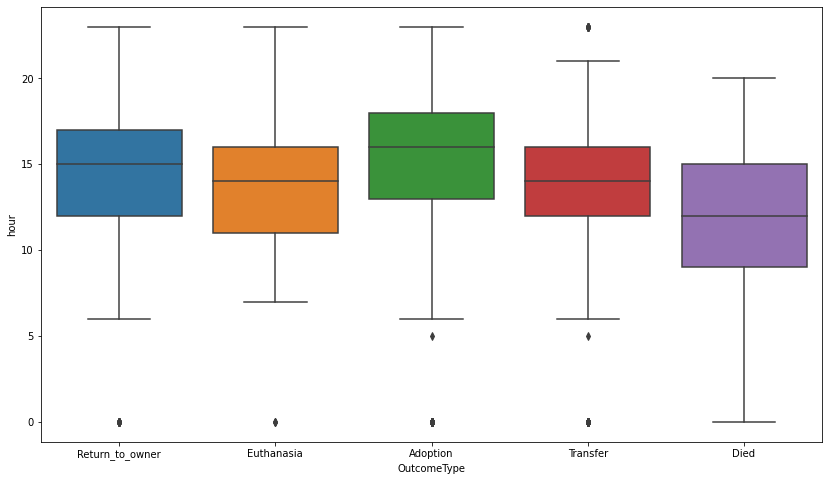

In [7]:
# 새로 추가한 column이 의미가 있는지 확인 -> boxplot 는 분포 보기 힘듦 
# boxplot -> 하나는 numerical, 하나는 categorical의 성격을 가지고 있어야 함

import matplotlib.pyplot as plt
import seaborn as sns
# 이 그림은 해석이 힘들다 -> outcome type, hour 둘 다 categorical성격
plt.figure(figsize = (14, 8)) 
sns.boxplot(alldata['OutcomeType'], alldata['hour'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hour', ylabel='count'>

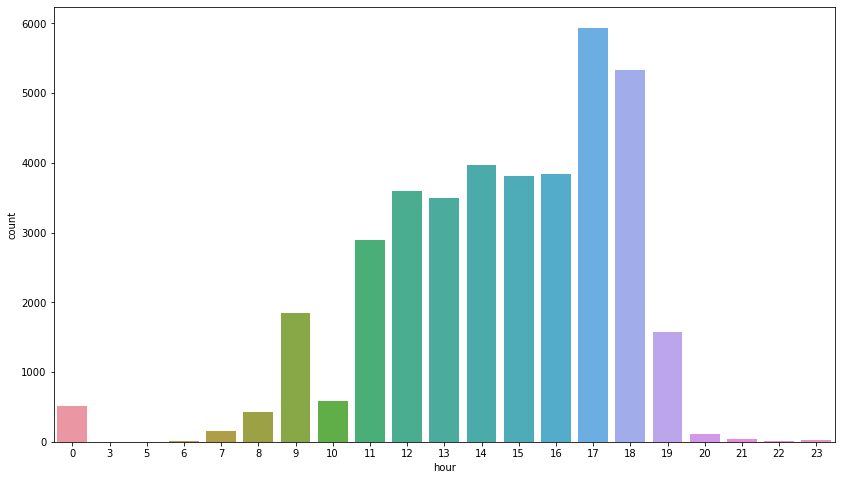

In [8]:
# Countplot 적용

plt.figure(figsize = (14, 8))
sns.countplot(alldata['hour']) # 시간대별 데이터 수 plot 
# 각각의 시간대멸로 정답 class 들의 분포를 확인해 보아야 함
# hour -> 4시가 2시의 2배 X -> categorical 변수

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hour', ylabel='count'>

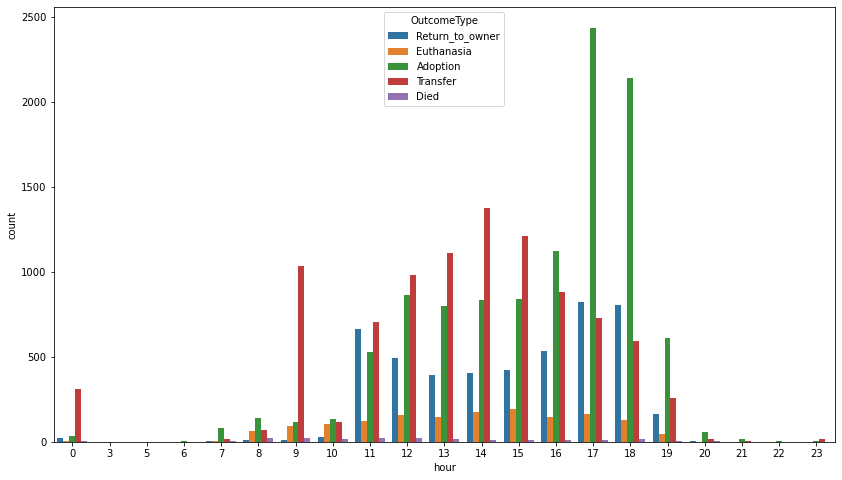

In [9]:
# 시간대별 Outcome Type 확인
plt.figure(figsize = (14, 8))
sns.countplot(alldata['hour'], hue = alldata['OutcomeType'])

# 시간대별 처리하는 일이 다름 -> 저녁 시간대는 입양의 비율이 높음 
# 개수보다 '비율'의 차이가 크다면 해당 시간대는 중요한 지표
# Return to Owner 의 비율이 오전 11시에 많음 -> 보호서 연 후 주인 확인 하는 시간들 포함해 11시부터 주인 찾아주는 업무 처리 급증
# EDA 후 추가, 점수계산 해보아야 함

In [10]:
# AgeuponOutcome -> day, week, month, year 기준이 다 다름, 숫자로 인식이 되어야 하는 column
# label encoding시 문제가 생김.
# 연속형 변수로 바꾸어주어야 함
alldata['AgeuponOutcome'].unique() # day 단위로 바꾸어주기

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '0 years', '14 years', '3 days', '6 days',
       '5 days', '5 weeks', '2 days', '16 years', '1 day', '13 years',
       nan, '17 years', '18 years', '19 years', '20 years', '22 years'],
      dtype=object)

In [11]:
# 함수 만들어서 AgeuponOutcome 변수값 바꿔주기
def age_preprocessing(age):
    if pd.isnull(age):# pd.isnull() >> 결측치인가?
        return -1 # 하나의 카테고리로 만든다 
    
    # 결측치 때문에 split 되지 않음 -> if 문으로 결측치 먼저 처리 후 split
    num = int(age.split()[0])
    if 'year' in age: # year, years 둘 다 포함할 때 
        return num * 365
    elif 'month' in age:
        return num*30
    elif 'week' in age:
        return num*7
    else:
        return num

In [12]:
# for문: 느림, 전의 내용이 처리가 되어야지 다음 것 접근할 수 있다
# pandas 안에 병렬로 처리하는 함수 사용

# apply() 함수 사용해서 age_preprocessing 함수를 해당 column에 적용
alldata['AgeuponOutcome'] = alldata['AgeuponOutcome'].apply(age_preprocessing) 
alldata

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,ID,year,month,day,hour
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,365,Shetland Sheepdog Mix,Brown/White,NaN,2014,2,12,18
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,365,Domestic Shorthair Mix,Cream Tabby,NaN,2013,10,13,12
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,730,Pit Bull Mix,Blue/White,NaN,2015,1,31,12
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,21,Domestic Shorthair Mix,Blue Cream,NaN,2014,7,11,19
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle,Tan,NaN,2013,11,15,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11451,NaN,NaN,2014-07-08 14:50:00,NaN,NaN,Cat,Neutered Male,60,Domestic Shorthair Mix,Black,11452.0,2014,7,8,14
11452,NaN,NaN,2014-10-21 12:57:00,NaN,NaN,Cat,Intact Female,14,Domestic Shorthair Mix,Blue,11453.0,2014,10,21,12
11453,NaN,NaN,2014-09-29 09:00:00,NaN,NaN,Cat,Intact Female,365,Domestic Shorthair Mix,Calico,11454.0,2014,9,29,9
11454,NaN,Rambo,2015-09-05 17:16:00,NaN,NaN,Dog,Neutered Male,2190,German Shepherd Mix,Black/Tan,11455.0,2015,9,5,17


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='OutcomeType', ylabel='AgeuponOutcome'>

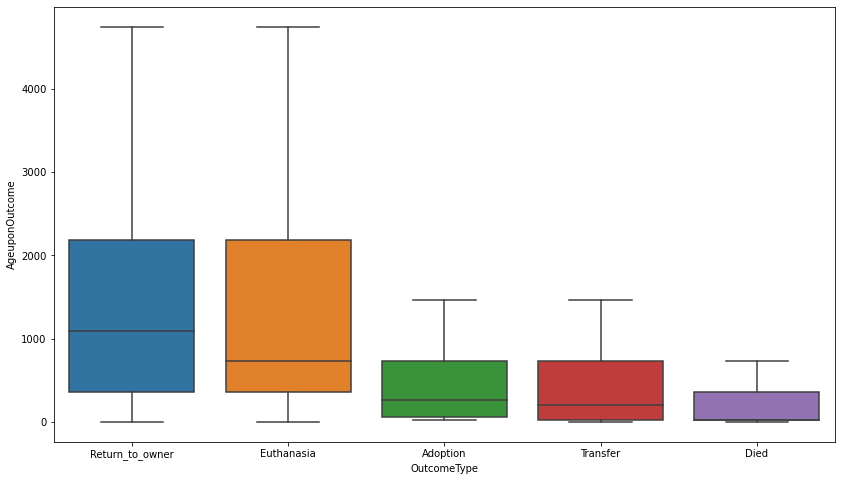

In [13]:
# 나이에 따른 처리 결과 비교 

plt.figure(figsize = (14, 8))
sns.boxplot(alldata['OutcomeType'], alldata['AgeuponOutcome'], showfliers = False) # showfliers = False: outlier 제거해줌
# 나이가 많으면 동물이 주인 있을 가능성 높음 -> Return_to_owner 가 높음, 입양 낮음

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='OutcomeType', ylabel='AgeuponOutcome'>

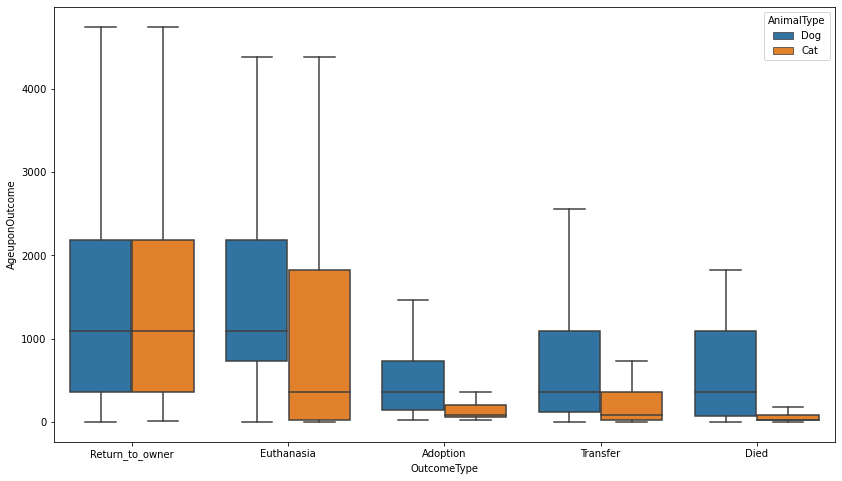

In [14]:
# 여러 개의 column 같이 보기 
plt.figure(figsize = (14, 8))
sns.boxplot(alldata['OutcomeType'], alldata['AgeuponOutcome'], showfliers = False, hue = alldata['AnimalType']) 
# 안락사 되는 경우-> 나이가 좀 있는 강아지들만 안락사 but 고양이는 어린 친구들도 안락사 시켜줌
# Adoption -> 고양이는 압도적으로 나이가 어릴 때 adopt 한다. 강아지는 나이 있어도 입양 해 감

In [15]:
# Name 있는 동물 -> 이전에 주인이 있었다는 지표, 있다/없다로 boolean 형태로 바꾸어줌

alldata['Name'] = alldata['Name'].notnull()
alldata # 이름 true/false 형태로 바뀜

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,ID,year,month,day,hour
0,A671945,True,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,365,Shetland Sheepdog Mix,Brown/White,NaN,2014,2,12,18
1,A656520,True,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,365,Domestic Shorthair Mix,Cream Tabby,NaN,2013,10,13,12
2,A686464,True,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,730,Pit Bull Mix,Blue/White,NaN,2015,1,31,12
3,A683430,False,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,21,Domestic Shorthair Mix,Blue Cream,NaN,2014,7,11,19
4,A667013,False,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle,Tan,NaN,2013,11,15,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11451,NaN,False,2014-07-08 14:50:00,NaN,NaN,Cat,Neutered Male,60,Domestic Shorthair Mix,Black,11452.0,2014,7,8,14
11452,NaN,False,2014-10-21 12:57:00,NaN,NaN,Cat,Intact Female,14,Domestic Shorthair Mix,Blue,11453.0,2014,10,21,12
11453,NaN,False,2014-09-29 09:00:00,NaN,NaN,Cat,Intact Female,365,Domestic Shorthair Mix,Calico,11454.0,2014,9,29,9
11454,NaN,True,2015-09-05 17:16:00,NaN,NaN,Dog,Neutered Male,2190,German Shepherd Mix,Black/Tan,11455.0,2015,9,5,17


In [16]:
# Breed, Color
# 여러 가지 요소들이 같이 들어가 있을 때 
# 단어가 다르다고 다른 요소로 encoding 하게 되면 위험하다 
# 문장, 문단이 들어가 있을 때 text mining으로 처리해 주어야 한다. 

In [17]:
# AnimalID -> 의미가 있을 수도 있음.. 조심할 것 
# Name 지우는 것? --> but 동물의 이름이 영향 줄 수도 있음
# 이름이 있다? --> 주인이 있다는 뜻도 됨
alldata2 = alldata.drop(columns = ['ID', 'OutcomeType', 'DateTime', 'OutcomeSubtype', 'AnimalID'])
alldata2

,Name,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,year,month,day,hour
0,True,Dog,Neutered Male,365,Shetland Sheepdog Mix,Brown/White,2014,2,12,18
1,True,Cat,Spayed Female,365,Domestic Shorthair Mix,Cream Tabby,2013,10,13,12
2,True,Dog,Neutered Male,730,Pit Bull Mix,Blue/White,2015,1,31,12
3,False,Cat,Intact Male,21,Domestic Shorthair Mix,Blue Cream,2014,7,11,19
4,False,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle,Tan,2013,11,15,12
...,...,...,...,...,...,...,...,...,...,...
11451,False,Cat,Neutered Male,60,Domestic Shorthair Mix,Black,2014,7,8,14
11452,False,Cat,Intact Female,14,Domestic Shorthair Mix,Blue,2014,10,21,12
11453,False,Cat,Intact Female,365,Domestic Shorthair Mix,Calico,2014,9,29,9
11454,True,Dog,Neutered Male,2190,German Shepherd Mix,Black/Tan,2015,9,5,17


In [18]:
# encoding 진행하기
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
c = alldata2.columns[alldata2.dtypes == object]
for i in c:
    alldata2[i] = le.fit_transform(alldata2[i])
alldata2

,Name,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,year,month,day,hour
0,True,1,2,365,1482,146,2014,2,12,18
1,True,0,3,365,775,184,2013,10,13,12
2,True,1,2,730,1293,97,2015,1,31,12
3,False,0,1,21,775,47,2014,7,11,19
4,False,1,2,730,1101,311,2013,11,15,12
...,...,...,...,...,...,...,...,...,...,...
11451,False,0,2,60,775,6,2014,7,8,14
11452,False,0,0,14,775,46,2014,10,21,12
11453,False,0,0,365,775,156,2014,9,29,9
11454,True,1,2,2190,841,40,2015,9,5,17


In [19]:
alldata2 = alldata2.fillna(-1) # 결측치 처리

# train/test 나누기
train2 = alldata2[:len(train)]
test2 = alldata2[len(train):]

In [20]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_jobs = -1)
# rf.fit(train2, train['OutcomeType'])
# result = rf.predict_proba(test2)
# result # 순서 알파벳순서로 들어가 있음

# # 분류 대회 -> 확률로 제출하자

In [21]:
# Catboost Classifier -> category column 많을때 나름 괜찮게 학습

from catboost import CatBoostClassifier
cbc = CatBoostClassifier() # 데이터 많지 않음 -> CPU로
cbc.fit(train2, train['OutcomeType'])
result = cbc.predict_proba(test2)

Learning rate set to 0.093562
0:	learn: 1.4711357	total: 70.8ms	remaining: 1m 10s
1:	learn: 1.3729138	total: 86.5ms	remaining: 43.1s
2:	learn: 1.2957896	total: 103ms	remaining: 34.1s
3:	learn: 1.2317936	total: 117ms	remaining: 29.1s
4:	learn: 1.1796665	total: 133ms	remaining: 26.4s
5:	learn: 1.1375687	total: 147ms	remaining: 24.4s
6:	learn: 1.0983186	total: 163ms	remaining: 23.2s
7:	learn: 1.0656135	total: 179ms	remaining: 22.1s
8:	learn: 1.0371131	total: 195ms	remaining: 21.4s
9:	learn: 1.0143459	total: 211ms	remaining: 20.9s
10:	learn: 0.9925937	total: 226ms	remaining: 20.3s
11:	learn: 0.9734014	total: 240ms	remaining: 19.8s
12:	learn: 0.9559788	total: 255ms	remaining: 19.4s
13:	learn: 0.9411890	total: 269ms	remaining: 18.9s
14:	learn: 0.9288873	total: 285ms	remaining: 18.7s
15:	learn: 0.9180806	total: 301ms	remaining: 18.5s
16:	learn: 0.9078836	total: 316ms	remaining: 18.3s
17:	learn: 0.8985121	total: 331ms	remaining: 18.1s
18:	learn: 0.8904791	total: 345ms	remaining: 17.8s
19:	lear

In [22]:
cbc.feature_importances_ # 모델이 어떤 column 중요하게 생각했는지 나옴 (모든 트리 계열 모델 가능)

array([ 5.91588816,  4.32985543, 15.80698639, 17.07238985,  9.2216225 ,
        7.99336548,  5.51067251,  9.75908001, 10.51328329, 13.87685639])

In [23]:
pd.Series(cbc.feature_importances_) # pandas에 'Series' 형식의 데이터 담는 형식 있음 -> 앞에 인덱스 붙여줌

0     5.915888
1     4.329855
2    15.806986
3    17.072390
4     9.221622
5     7.993365
6     5.510673
7     9.759080
8    10.513283
9    13.876856
dtype: float64

In [24]:
pd.Series(cbc.feature_importances_, index = train2.columns) # train2.columns들을 인덱스로

Name               5.915888
AnimalType         4.329855
SexuponOutcome    15.806986
AgeuponOutcome    17.072390
Breed              9.221622
Color              7.993365
year               5.510673
month              9.759080
day               10.513283
hour              13.876856
dtype: float64

In [25]:
# 내림차순으로 정렬
# ascending = False -> 기본 값 true
# 어떤 column이 중요한지 알 수 있음
# 중요도 다 더하면 1 나옴 (상대적인 비율로 들어가 있음)
pd.Series(cbc.feature_importances_, index = train2.columns).sort_values(ascending = False)

AgeuponOutcome    17.072390
SexuponOutcome    15.806986
hour              13.876856
day               10.513283
month              9.759080
Breed              9.221622
Color              7.993365
Name               5.915888
year               5.510673
AnimalType         4.329855
dtype: float64

In [26]:
# 변수중요도 저장

importance = pd.Series(cbc.feature_importances_, index = train2.columns).sort_values(ascending = False)
importance 
# index와 value 값을 접근할 수 있게 됨
# importance.values, importance.index

AgeuponOutcome    17.072390
SexuponOutcome    15.806986
hour              13.876856
day               10.513283
month              9.759080
Breed              9.221622
Color              7.993365
Name               5.915888
year               5.510673
AnimalType         4.329855
dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

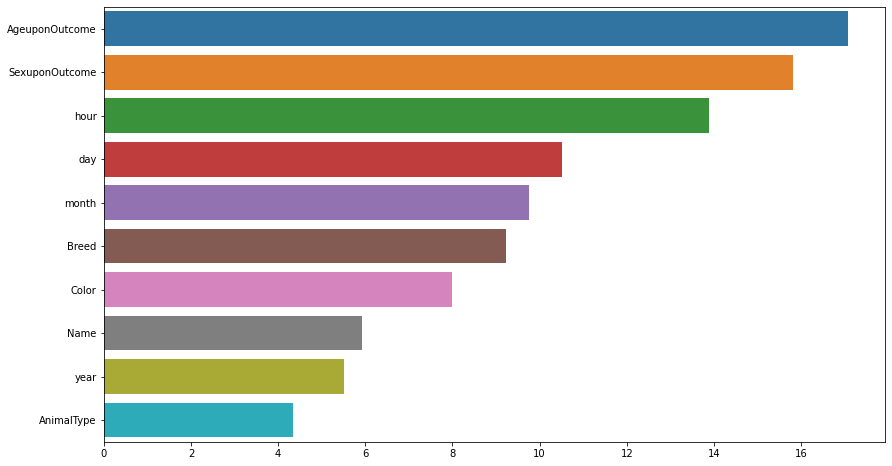

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# 어떤 column 중요한지 그림으로 나타내기
# 변수중요도 볼 때 -> barplot 좋음
plt.figure(figsize = (14, 8))
sns.barplot(importance.values, importance.index) 

In [28]:
sub = pd.read_csv('/kaggle/input/shelter-animal-outcomes/sample_submission.csv.gz')
sub

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,1,0,0,0,0
1,2,1,0,0,0,0
2,3,1,0,0,0,0
3,4,1,0,0,0,0
4,5,1,0,0,0,0
...,...,...,...,...,...,...
11451,11452,1,0,0,0,0
11452,11453,1,0,0,0,0
11453,11454,1,0,0,0,0
11454,11455,1,0,0,0,0


In [29]:
sub.iloc[:,1:] = result
sub

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,0.036936,0.001056,0.019405,0.165550,0.777052
1,2,0.584079,0.000551,0.016022,0.347038,0.052310
2,3,0.468767,0.001232,0.015875,0.228766,0.285361
3,4,0.252658,0.000637,0.058587,0.106715,0.581402
4,5,0.513379,0.000494,0.001984,0.431930,0.052214
...,...,...,...,...,...,...
11451,11452,0.692386,0.001532,0.020026,0.012476,0.273581
11452,11453,0.000540,0.012466,0.044211,0.000846,0.941938
11453,11454,0.001017,0.002327,0.012655,0.000607,0.983393
11454,11455,0.287501,0.001109,0.019324,0.631969,0.060097


In [30]:
sub.to_csv('submission_final.csv', index = False)